# Case Study with Boston Crime Dataset

* **AUTHOR** : *Emre Okçular*
* **DATE** : 08.09.2019 Sunday

Firstly, I installed virtualenv and vitualenvwrapper packages. Then I created a virtual environment for this case study project. Virtualenv is used to manage Python packages for different projects. Using virtualenv allows you to avoid installing Python packages globally which could break system tools or other projects. Below, you can see the packages that I used for this analysis.

In [ ]:
!workon DataScience

In [1]:
pip freeze # Package Dependencies

appnope==0.1.0
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
backcall==0.1.0
bleach==3.1.0
branca==0.3.1
certifi==2019.6.16
chardet==3.0.4
colorlover==0.3.0
confuse==1.0.0
cufflinks==0.16
cycler==0.10.0
decorator==4.4.0
defusedxml==0.6.0
entrypoints==0.3
folium==0.10.0
graphviz==0.11.1
htmlmin==0.1.12
idna==2.8
importlib-metadata==0.19
ipykernel==5.1.1
ipython==7.6.1
ipython-genutils==0.2.0
ipywidgets==7.5.0
isort==4.3.21
jedi==0.14.1
Jinja2==2.10.1
joblib==0.13.2
jsonschema==3.0.1
jupyter==1.0.0
jupyter-client==5.3.1
jupyter-console==6.0.0
jupyter-contrib-core==0.3.3
jupyter-contrib-nbextensions==0.5.1
jupyter-core==4.5.0
jupyter-highlight-selected-word==0.2.0
jupyter-latex-envs==1.4.6
jupyter-nbextensions-configurator==0.4.1
kaggle==1.5.4
kiwisolver==1.1.0
lazy-object-proxy==1.4.1
llvmlite==0.29.0
lxml==4.3.4
MarkupSafe==1.1.1
matplotlib==3.1.1
mccabe==0.6.1
missingno==0.4.2
mistune==0.8.4
more-itertools==7.2.0
nbconvert==5.5.0
nbformat==4.4.0
notebook==6.0.0
numba=

In [ ]:
pip install requirements.txt # You need to install required packages.

In [2]:
#Necessary imports 
import pandas as pd # Most common library for data science
pd.options.display.max_rows = 500 # I set max rows to see more output
pd.options.display.max_columns = 500 # I set max columns to see more outputs.
import numpy as np # Numerical callculations with data.
import pandas_profiling # Very useful package for EDA with dynamic HTML frontend.
import graphviz # Visualisation
import cufflinks as cf # For interactive charts
from plotly.offline import init_notebook_mode, iplot # Visualisation
from pandas.plotting import parallel_coordinates # Visualisation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # Preprocessing tools.
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation
import plotly.offline # Visualisation
%matplotlib inline
%config InlineBackend.figure_format='retina' # I set this property for high resolution for graphs.
import warnings # Supress warnings.
warnings.filterwarnings('ignore')
import xlrd # Read excel files.
import os # Operating System
import sys # System
import kaggle
import folium # Visualisation.
from folium import plugins

In [3]:
sys.version[0:5] # Python 3 is used.

'3.7.0'

### Read Dataset

I used kaggle API in order to download the Titanic Dataset directly from the Kaggle website. Since I had an account I got the API Token after I agreed terms and conditions of the dataset.

In [ ]:
pip install kaggle

In [ ]:
!kaggle datasets download -d ankkur13/boston-crime-data

In [4]:
#Read data from local disc
data = pd.read_csv('/Users/emre/Dev/Envs/DataScience/data/crime.csv',encoding = 'ISO-8859-1')

## Exploratory Data Analysis and Visualisation

In [5]:
data.head(10)

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I182080058          2403               Disorderly Conduct   
1      I182080053          3201                    Property Lost   
2      I182080052          2647                            Other   
3      I182080051           413               Aggravated Assault   
4      I182080050          3122                         Aircraft   
5      I182080049          1402                        Vandalism   
6      I182080048          3803  Motor Vehicle Accident Response   
7      I182080047          3301                  Verbal Disputes   
8      I182080045           802                   Simple Assault   
9      I182080044          3410                            Towed   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495      NaN   
1                 PROPERTY - LOST      D14            795      NaN   
2       THREATS TO DO BODILY HARM       B2            329      NaN   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92      NaN   
4              AIRCRAFT INCIDENTS       A7             36      NaN   
5                       VANDALISM      C11            351      NaN   
6  M/V ACCIDENT - PERSONAL INJURY      NaN                     NaN   
7                  VERBAL DISPUTE       B2            603      NaN   
8        ASSAULT SIMPLE - BATTERY      E18            543      NaN   
9             TOWED MOTOR VEHICLE       D4            621      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   
5  2018-10-02 20:40:00  2018     10     Tuesday    20    Part Two   
6  2018-10-03 20:16:00  2018     10   Wednesday    20  Part Three   
7  2018-10-03 19:32:00  2018     10   Wednesday    19  Part Three   
8  2018-10-03 19:27:51  2018     10   Wednesday    19    Part Two   
9  2018-10-03 20:00:00  2018     10   Wednesday    20  Part Three   

             STREET        Lat       Long                     Location  
0      ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1        ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2          DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3      CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4       PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)  
5    DORCHESTER AVE  42.299197 -71.060470  (42.29919694, -71.06046974)  
6               NaN  42.320734 -71.056764  (42.32073413, -71.05676415)  
7        TREMONT ST  42.333807 -71.103778  (42.33380683, -71.10377843)  
8          AVILA RD  42.256145 -71.128025  (42.25614494, -71.12802506)  
9  COMMONWEALTH AVE  42.348866 -71.089363  (42.34886600, -71.08936284)

In [6]:
data.size

5572940

In [7]:
def printDetails(x):
    print("Total Size               : "  , str(x.size))
    print ("Total Number of Rows     : " ,x.shape[0])
    print ("Total Number of Columns  : " ,x.shape[1])
    print ("\nFeatures : \n\n" ,x.columns.tolist())
    print ("\nMissing values :  \n", x.isnull().sum().values.sum())
    print ("\nUnique values :  \n\n",x.nunique())
    print("\nColumn Types : \n")
    print(x.dtypes)

In [8]:
printDetails(data)

Total Size               :  5572940
Total Number of Rows     :  327820
Total Number of Columns  :  17

Features : 

 ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']

Missing values :  
 380873

Unique values :  

 INCIDENT_NUMBER        290156
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            880
SHOOTING                    1
OCCURRED_ON_DATE       239364
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4684
Lat                     18239
Long                    18239
Location                18255
dtype: int64

Column Types : 

INCIDENT_NUMBER         object
OFFENSE_CODE             int64

In [9]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

In [10]:
# The profiling report can also be exported into an interactive HTML file with the following code.
profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Boston Crime Data Profiling.html")

In [11]:
# You can find this file in e-mail attachments. 
pandas_profiling.ProfileReport(data)

In [12]:
data['DISTRICT'].value_counts()

B2     51288
C11    43817
D4     43338
A1     36735
B3     36400
C6     24190
D14    20632
E13    17981
E18    17825
A7     13634
E5     13543
A15     6663
Name: DISTRICT, dtype: int64

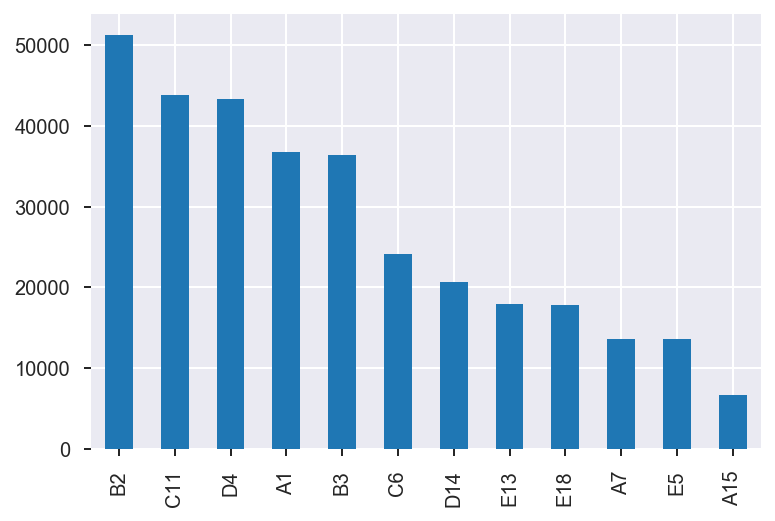

In [13]:
data['DISTRICT'].value_counts().plot.bar()

In [14]:
data['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              38134
Larceny                                      26670
Medical Assistance                           24226
Investigate Person                           19176
Other                                        18612
Drug Violation                               17037
Simple Assault                               16263
Vandalism                                    15810
Verbal Disputes                              13478
Towed                                        11632
Investigate Property                         11443
Larceny From Motor Vehicle                   11120
Property Lost                                10077
Warrant Arrests                               8579
Aggravated Assault                            8033
Violations                                    6226
Fraud                                         6033
Residential Burglary                          5723
Missing Person Located                        5133
Auto Theft                     

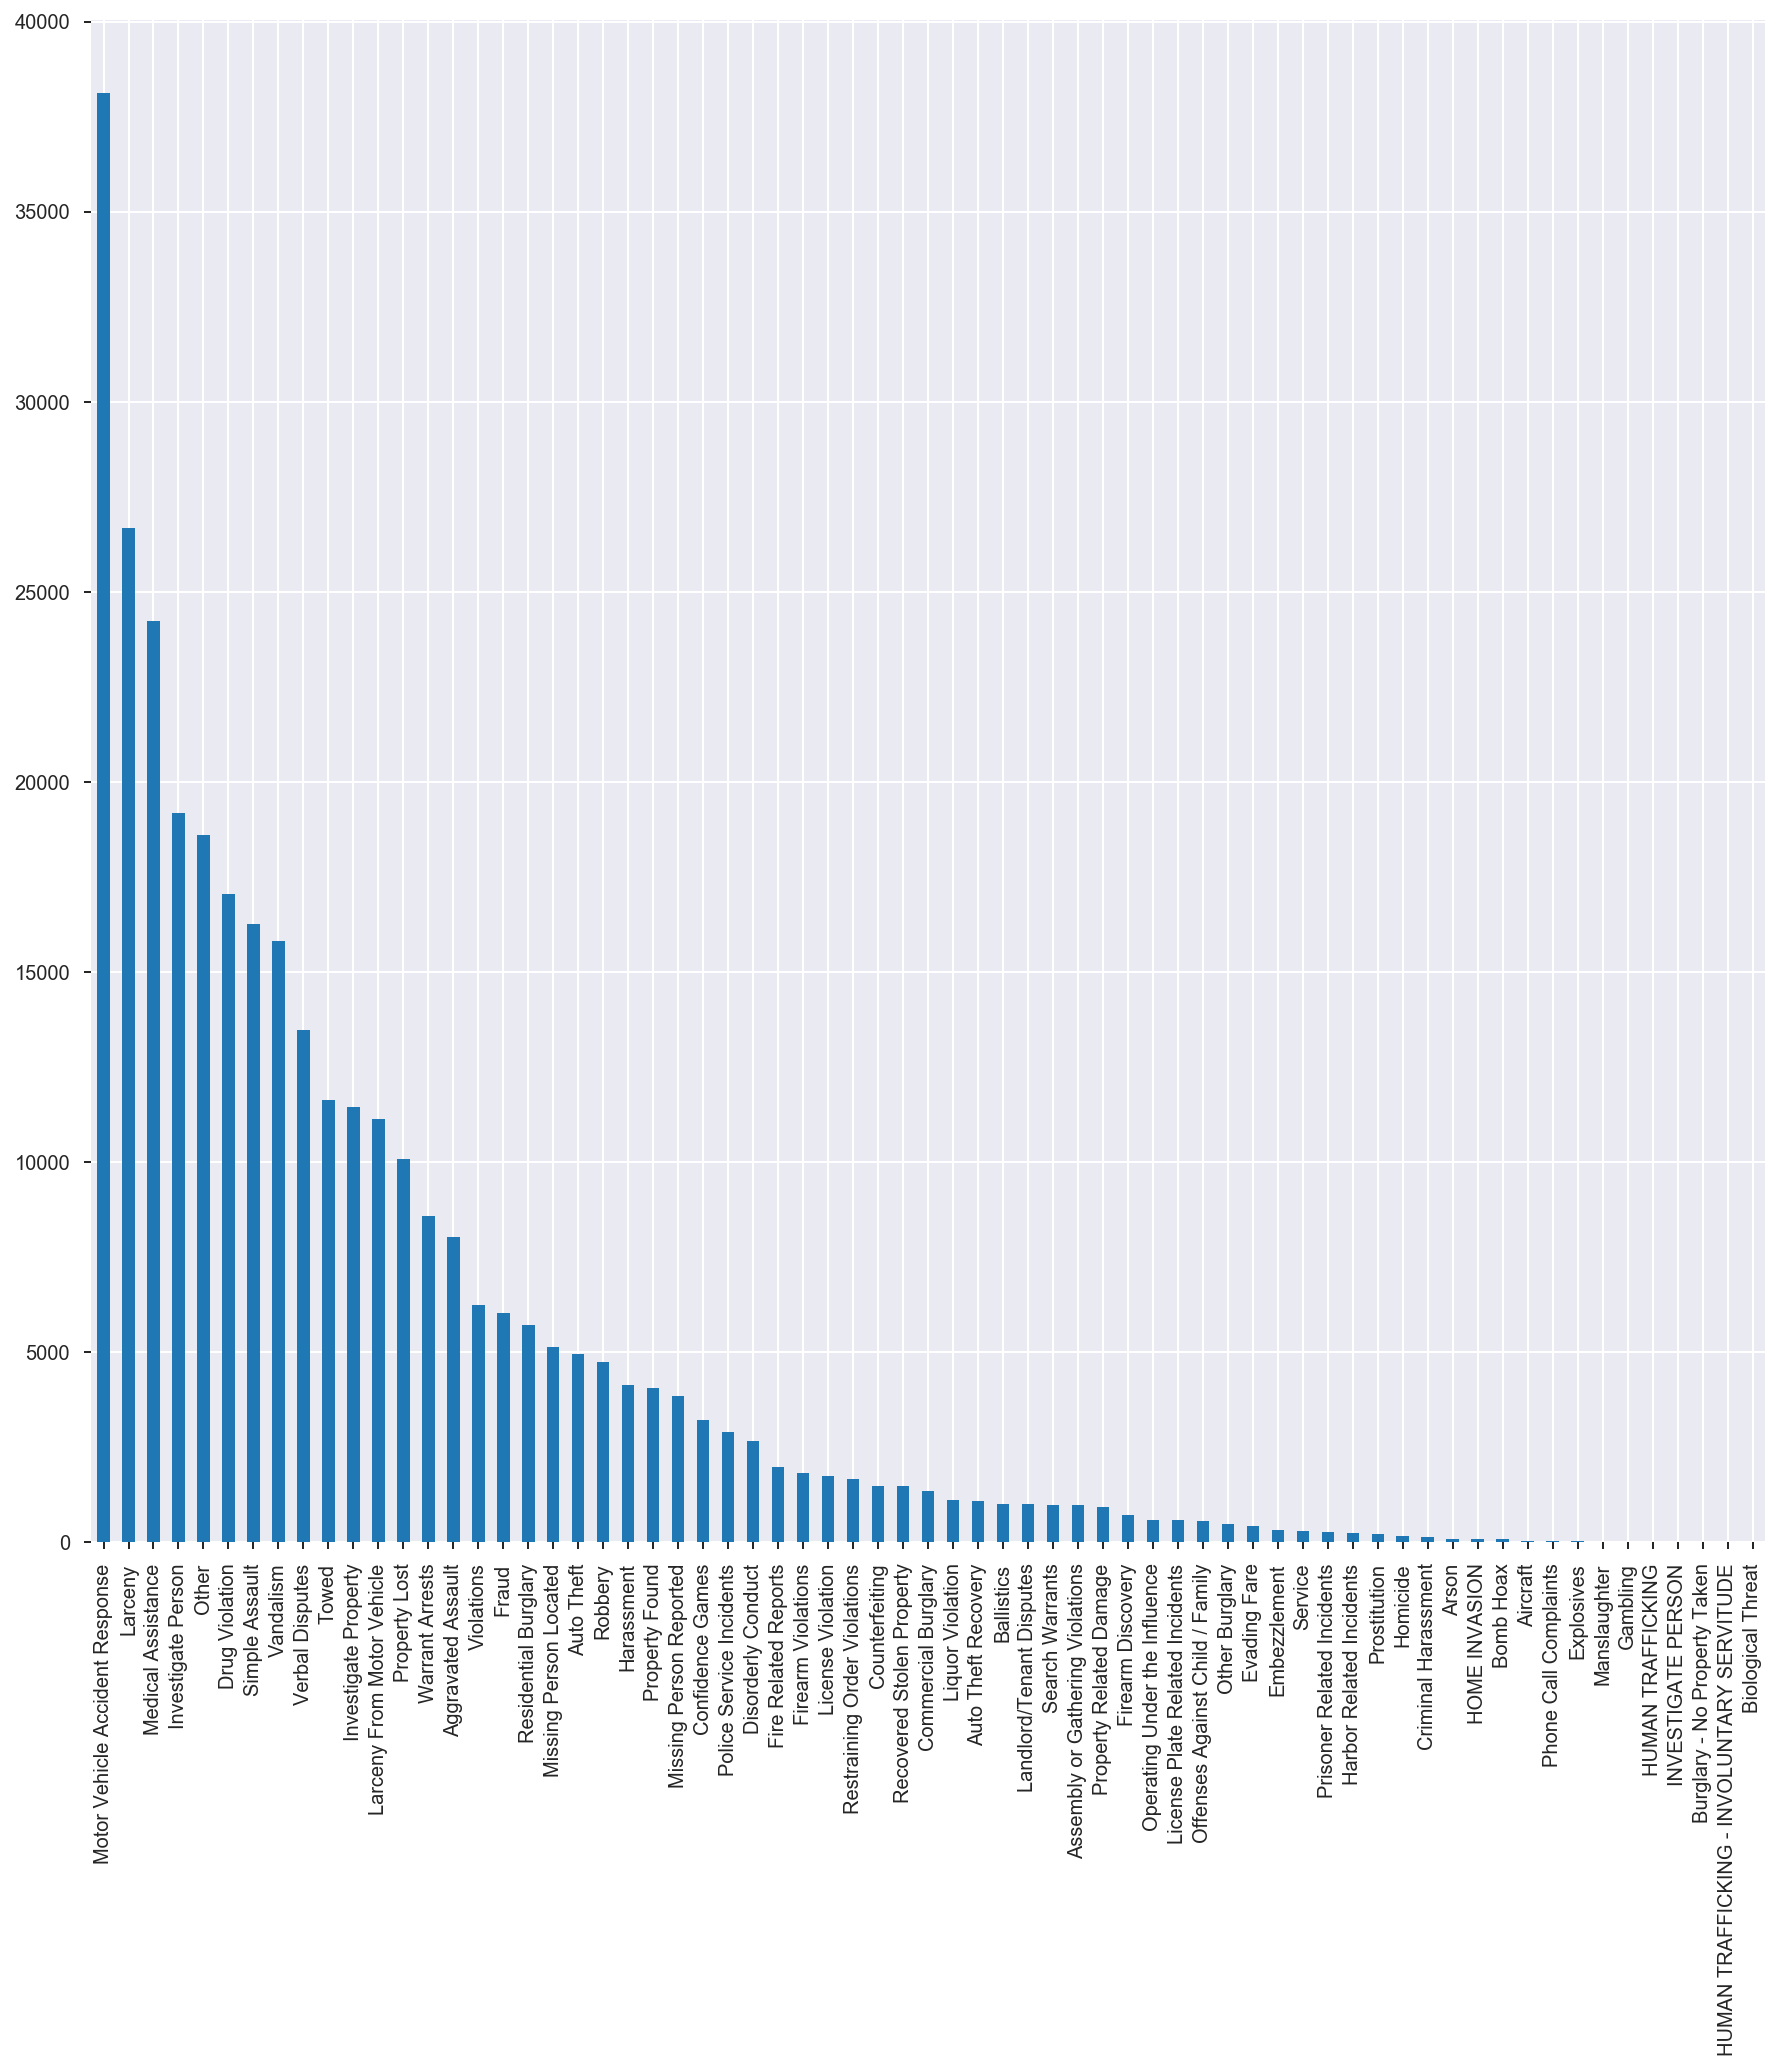

In [15]:
plt.figure(figsize=(15,14))
data['OFFENSE_CODE_GROUP'].value_counts().plot.bar()

In [16]:
yeargroup=data.groupby(by='YEAR')

count=yeargroup.count()

yearnumber=pd.DataFrame(count.iloc[:,0])

yearnumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)

yearnumber

NUMBER
YEAR        
2015   53392
2016   99134
2017  100938
2018   74356

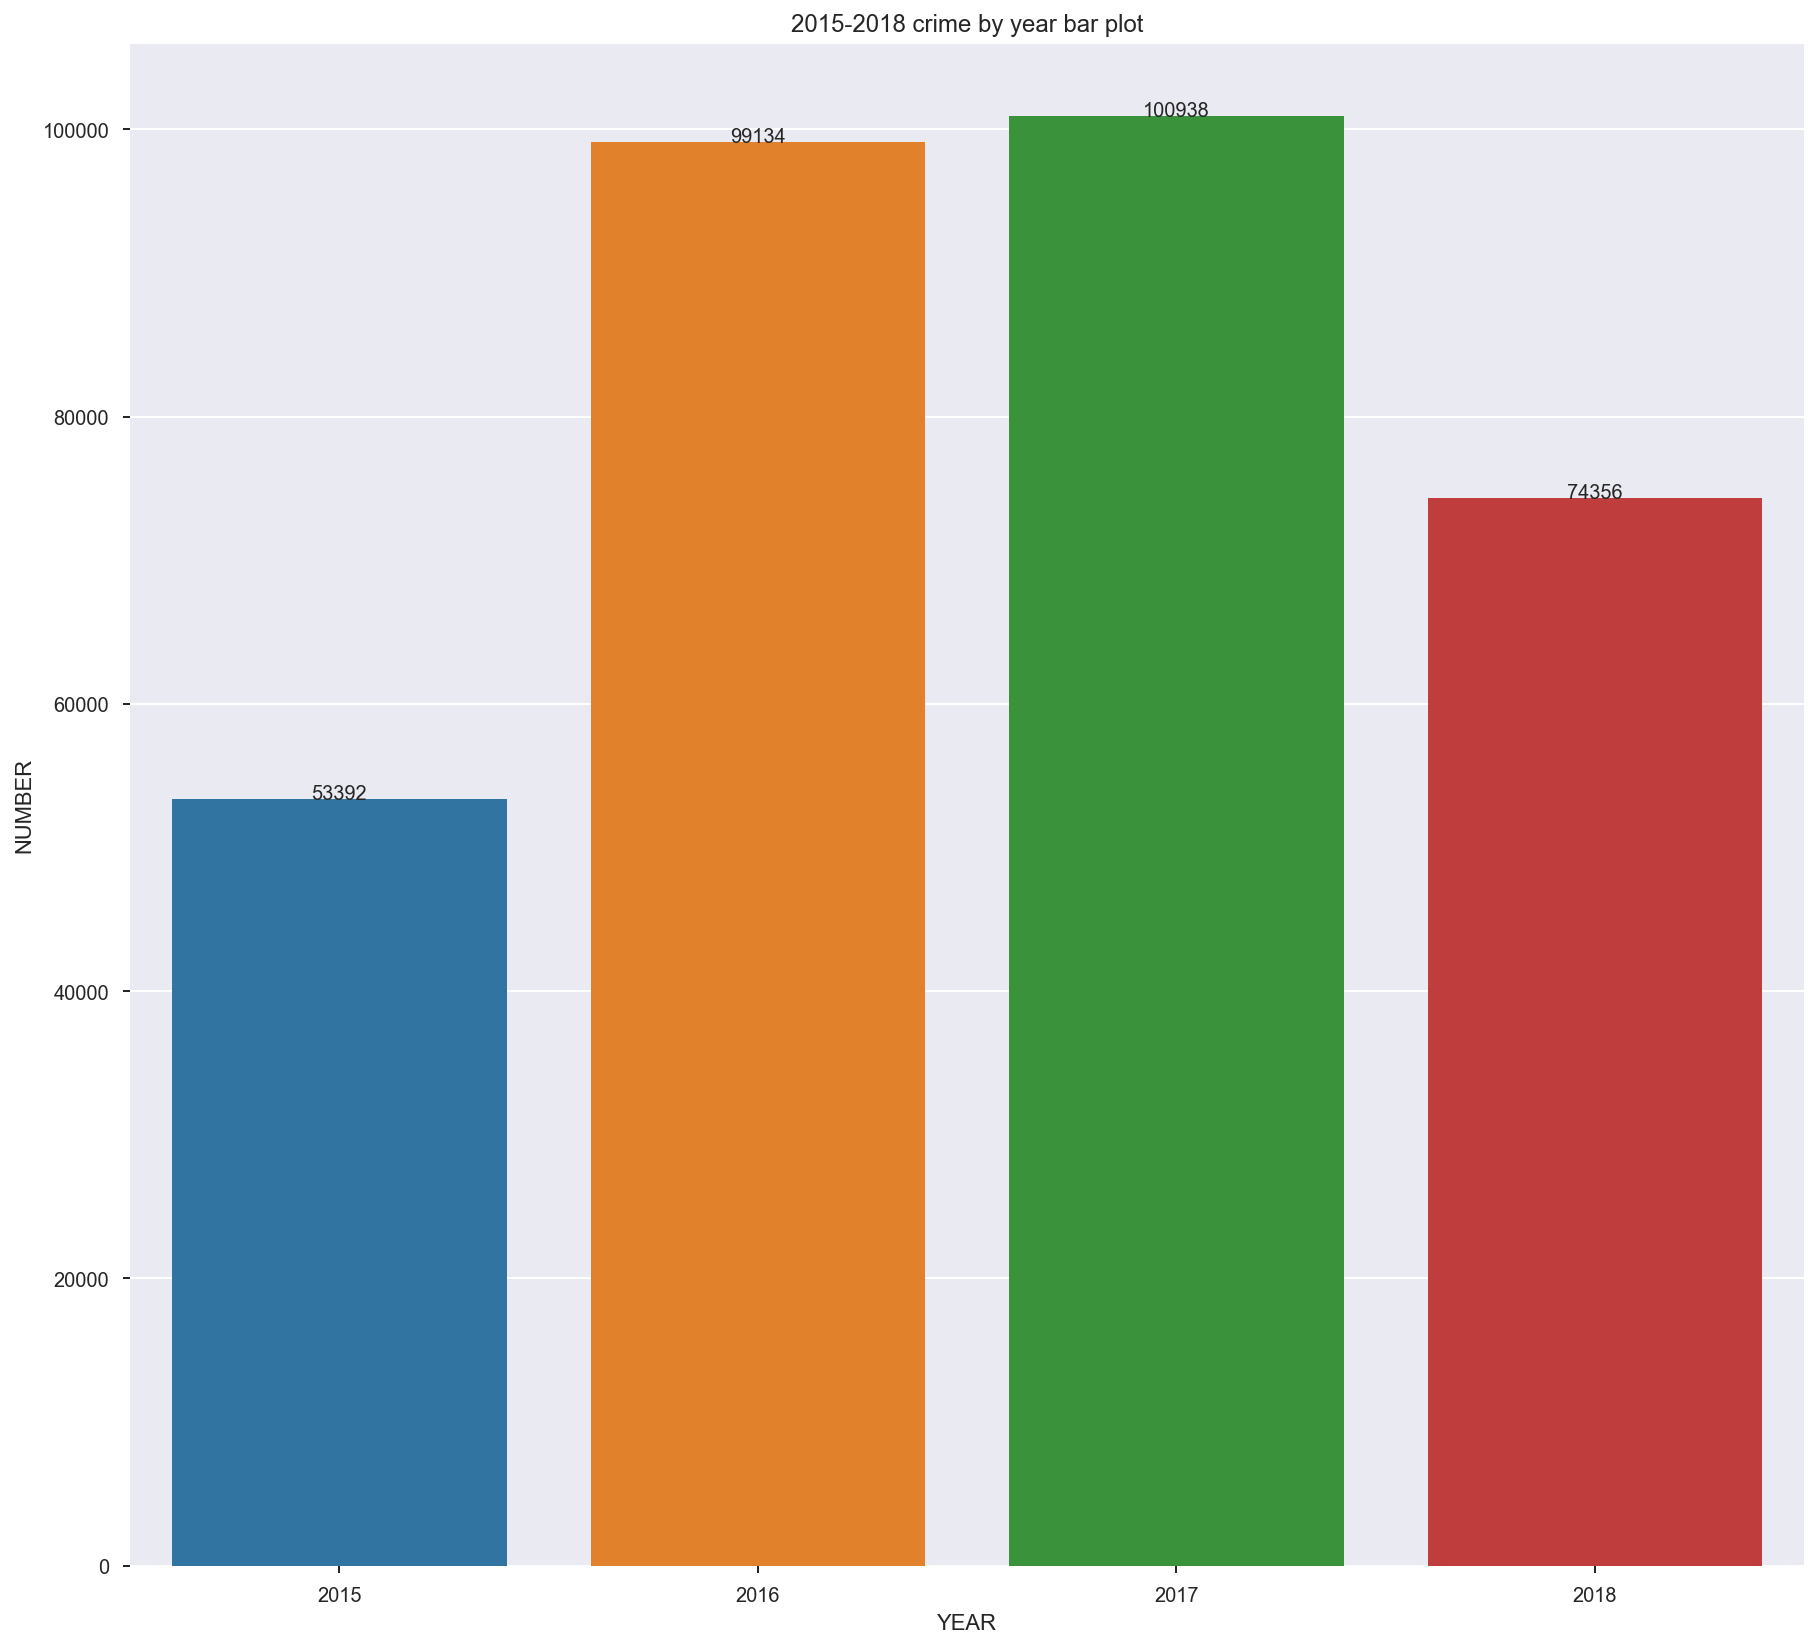

In [17]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 crime by year bar plot')
p3=sns.barplot(x=yearnumber.index,y='NUMBER',data=yearnumber)
x=np.arange(yearnumber.index.shape[0])
y=np.array(list(yearnumber['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
else:
    pass
p3fig=p3.get_figure()
p3fig.savefig('./total_by_year_bar.png')
plt.show()

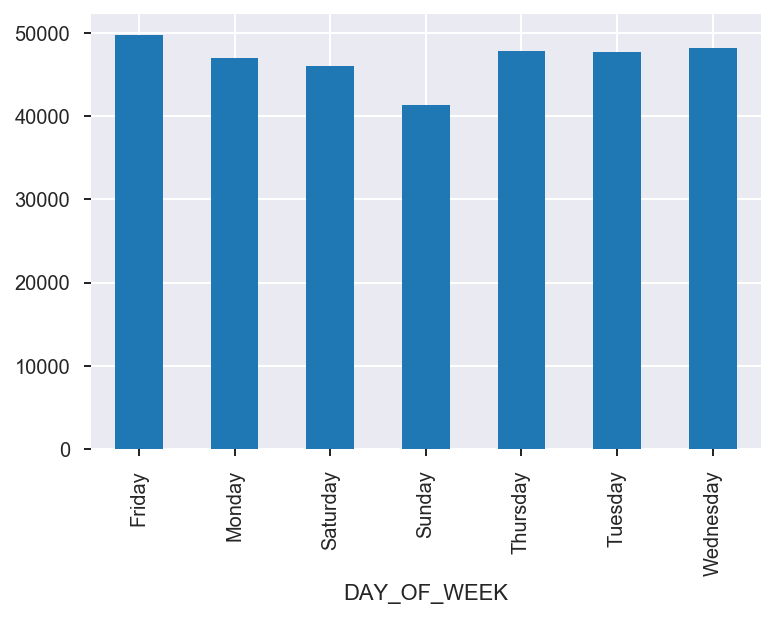

In [18]:
data.groupby(['DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().plot(kind = 'bar')

In [19]:
#splitting the day into 'midnight','morning','afternoon','evening'
data['period']= pd.cut( data.HOUR,
                          [0,6,12,18,23],
                          labels=['midnight','morning','afternoon','evening'],
                          include_lowest=True
                          )

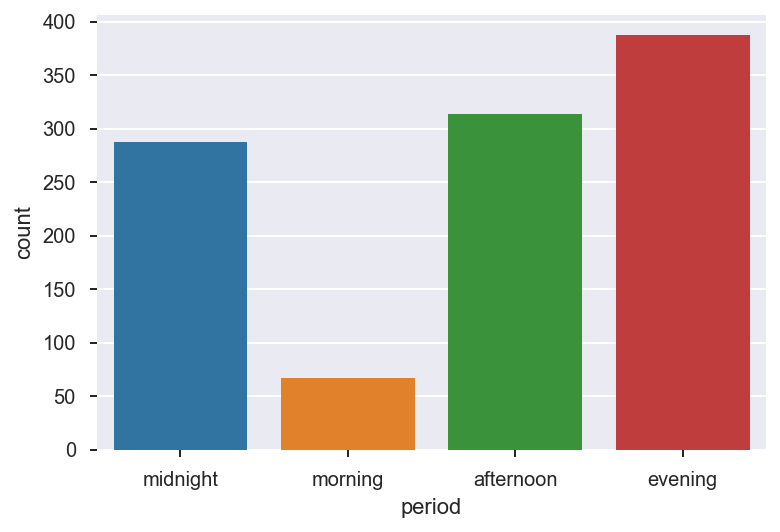

In [20]:
shooting=data.loc[data['SHOOTING']=='Y'].groupby('period').size().reset_index(name='count')
sns.barplot(x = "period",     
            y= "count",        
            data=shooting
            )

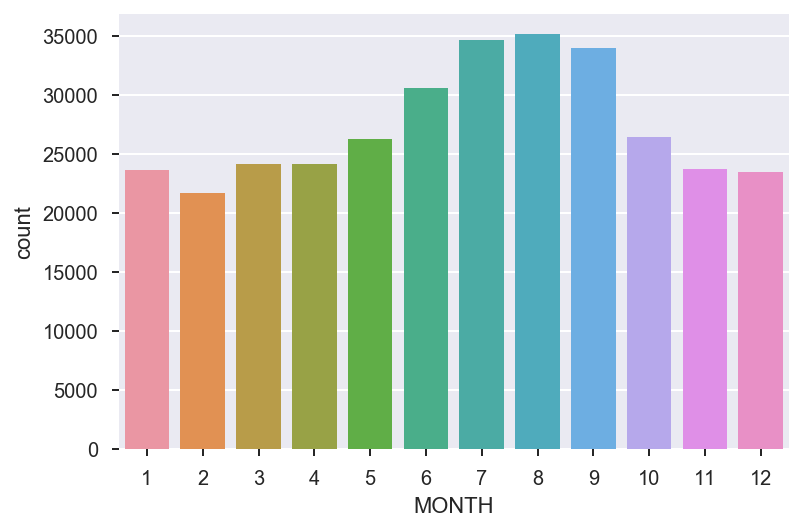

In [21]:
##Distribution of crimes by Month
sns.countplot("MONTH", data = data)
#the highest crime rates are in the months Aug, Sep, & Oct

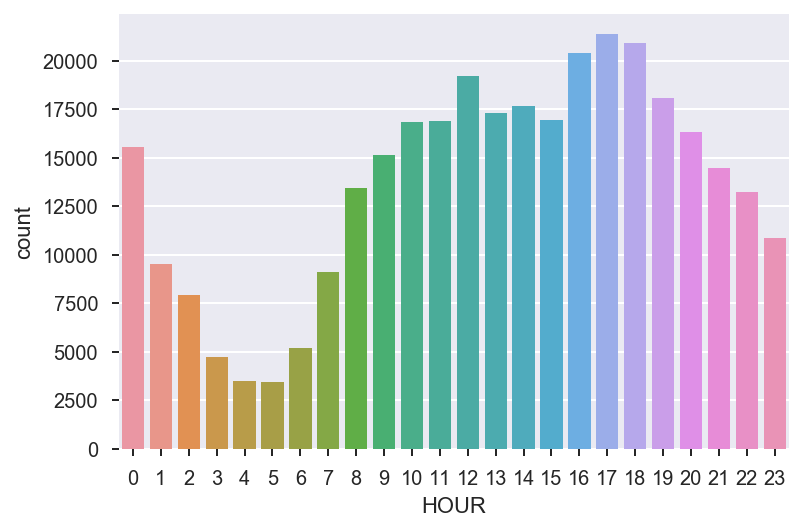

In [22]:
#what is the total number of crimes occured in each hour of a day
sns.countplot('HOUR',data= data)

In [23]:
data.OFFENSE_CODE_GROUP.unique()

array(['Disorderly Conduct', 'Property Lost', 'Other',
       'Aggravated Assault', 'Aircraft', 'Vandalism',
       'Motor Vehicle Accident Response', 'Verbal Disputes',
       'Simple Assault', 'Towed', 'Auto Theft', 'Medical Assistance',
       'Investigate Person', 'Fire Related Reports', 'Larceny',
       'Investigate Property', 'Harassment', 'Robbery', 'Drug Violation',
       'Violations', 'Liquor Violation', 'Fraud', 'Warrant Arrests',
       'Recovered Stolen Property', 'Residential Burglary',
       'Restraining Order Violations', 'Property Found',
       'Missing Person Reported', 'Confidence Games', 'Ballistics',
       'Larceny From Motor Vehicle', 'HOME INVASION',
       'Landlord/Tenant Disputes', 'Firearm Violations',
       'Missing Person Located', 'Prisoner Related Incidents',
       'Auto Theft Recovery', 'License Plate Related Incidents',
       'Embezzlement', 'Property Related Damage', 'Other Burglary',
       'Operating Under the Influence', 'Commercial Burglary'

In [24]:
sizes = data['OFFENSE_CODE_GROUP'].value_counts(sort = True)
labels = list(data['OFFENSE_CODE_GROUP'].unique())

Text(0.5, 1.0, 'Pie Chart of Offense Code Group')

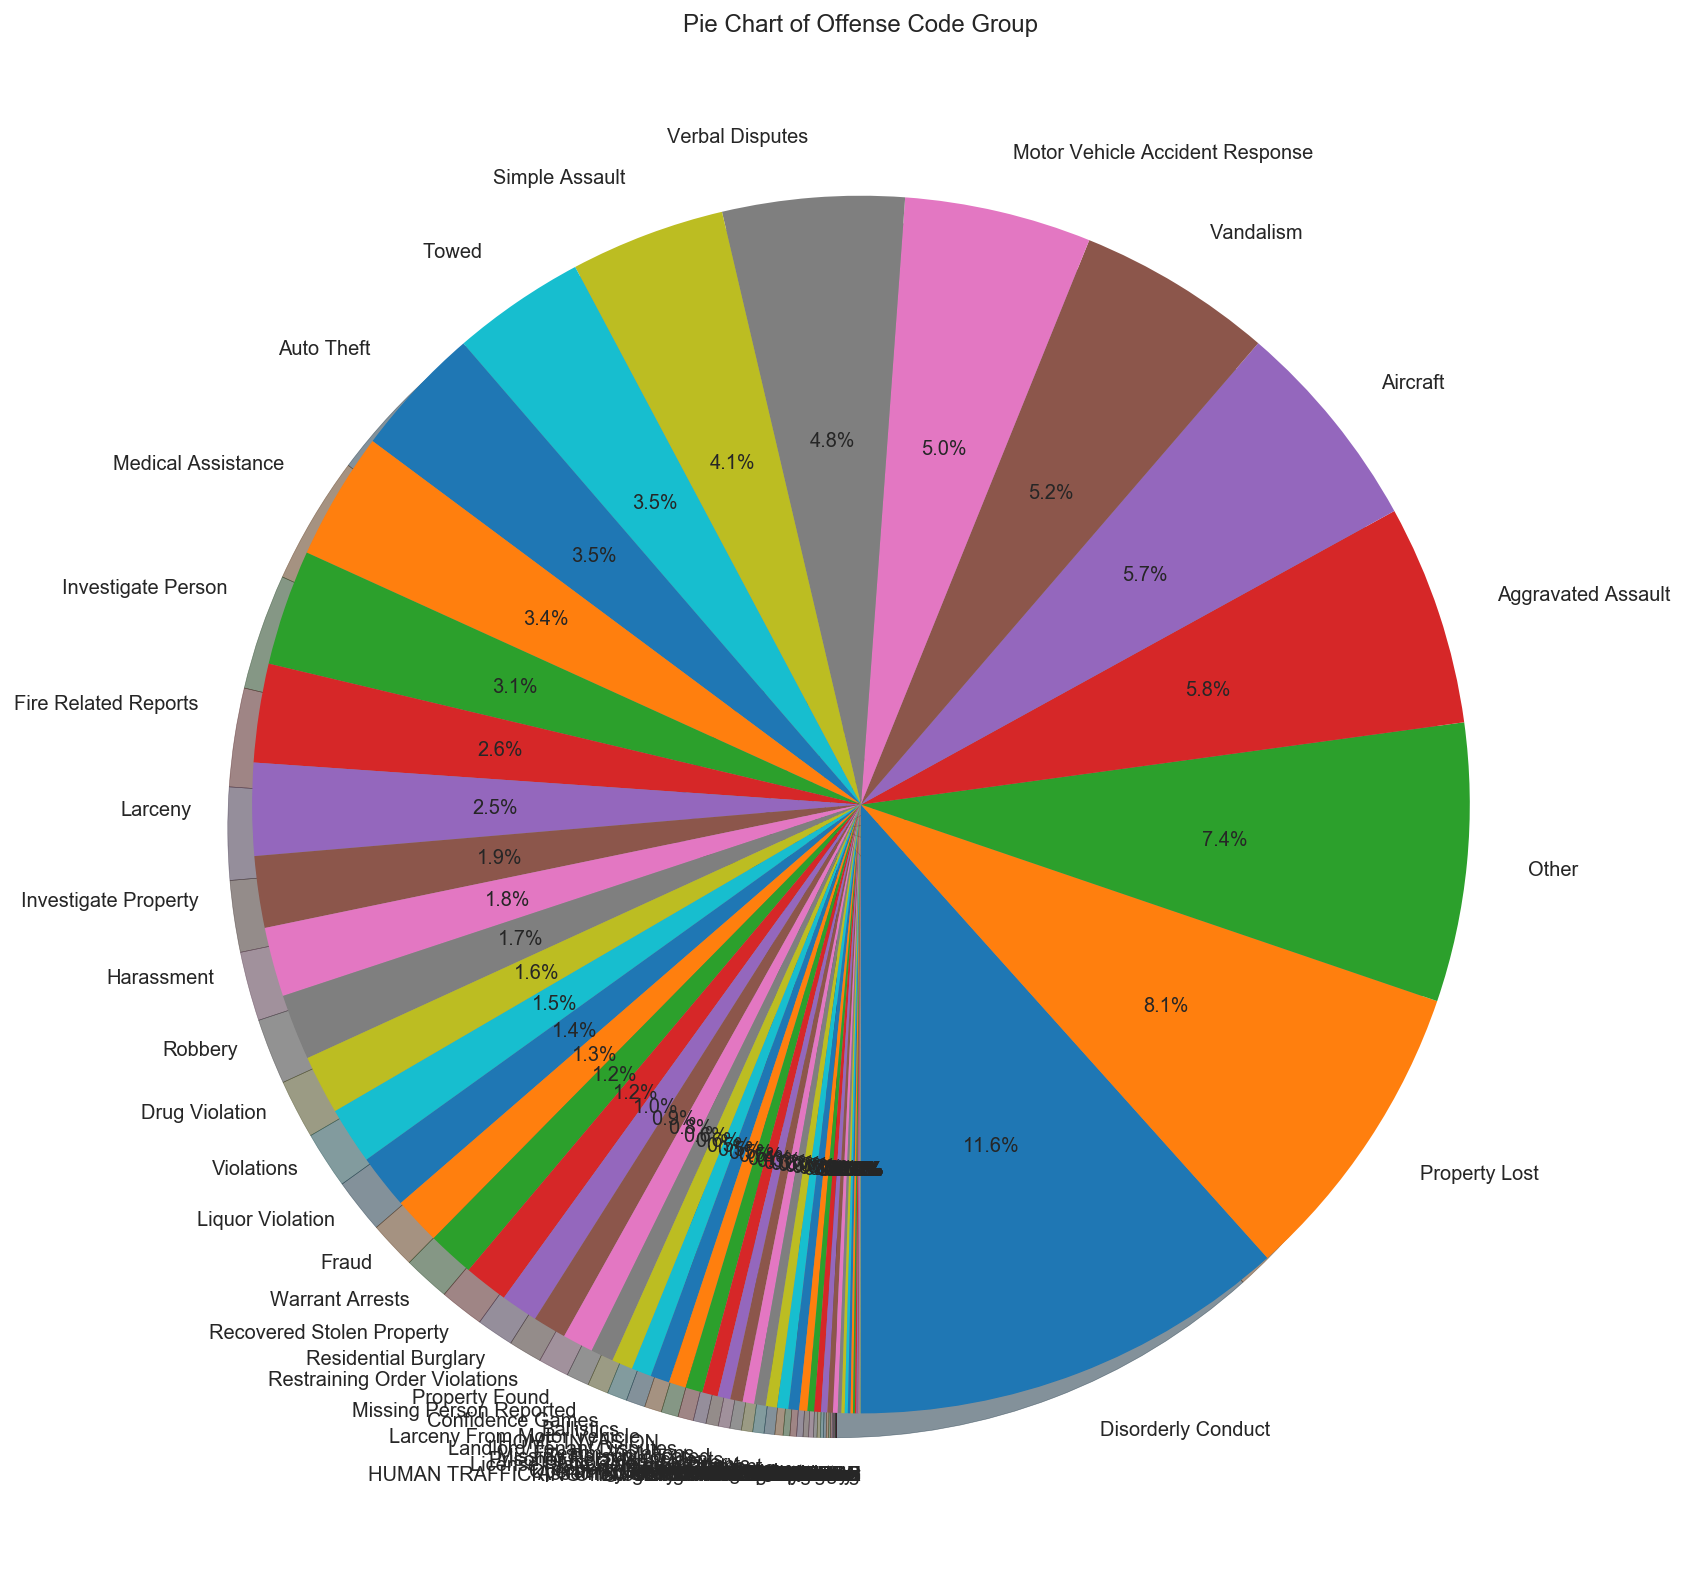

In [25]:
plt.figure(figsize=(15,14))
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Pie Chart of Offense Code Group')

Histogram of Offence Code


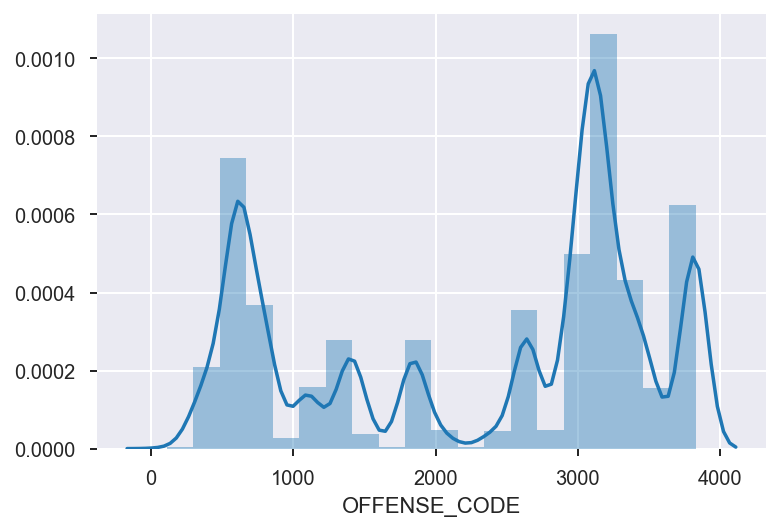

In [26]:
print('Histogram of Offence Code')
sns.distplot( data["OFFENSE_CODE"] , bins=20 )

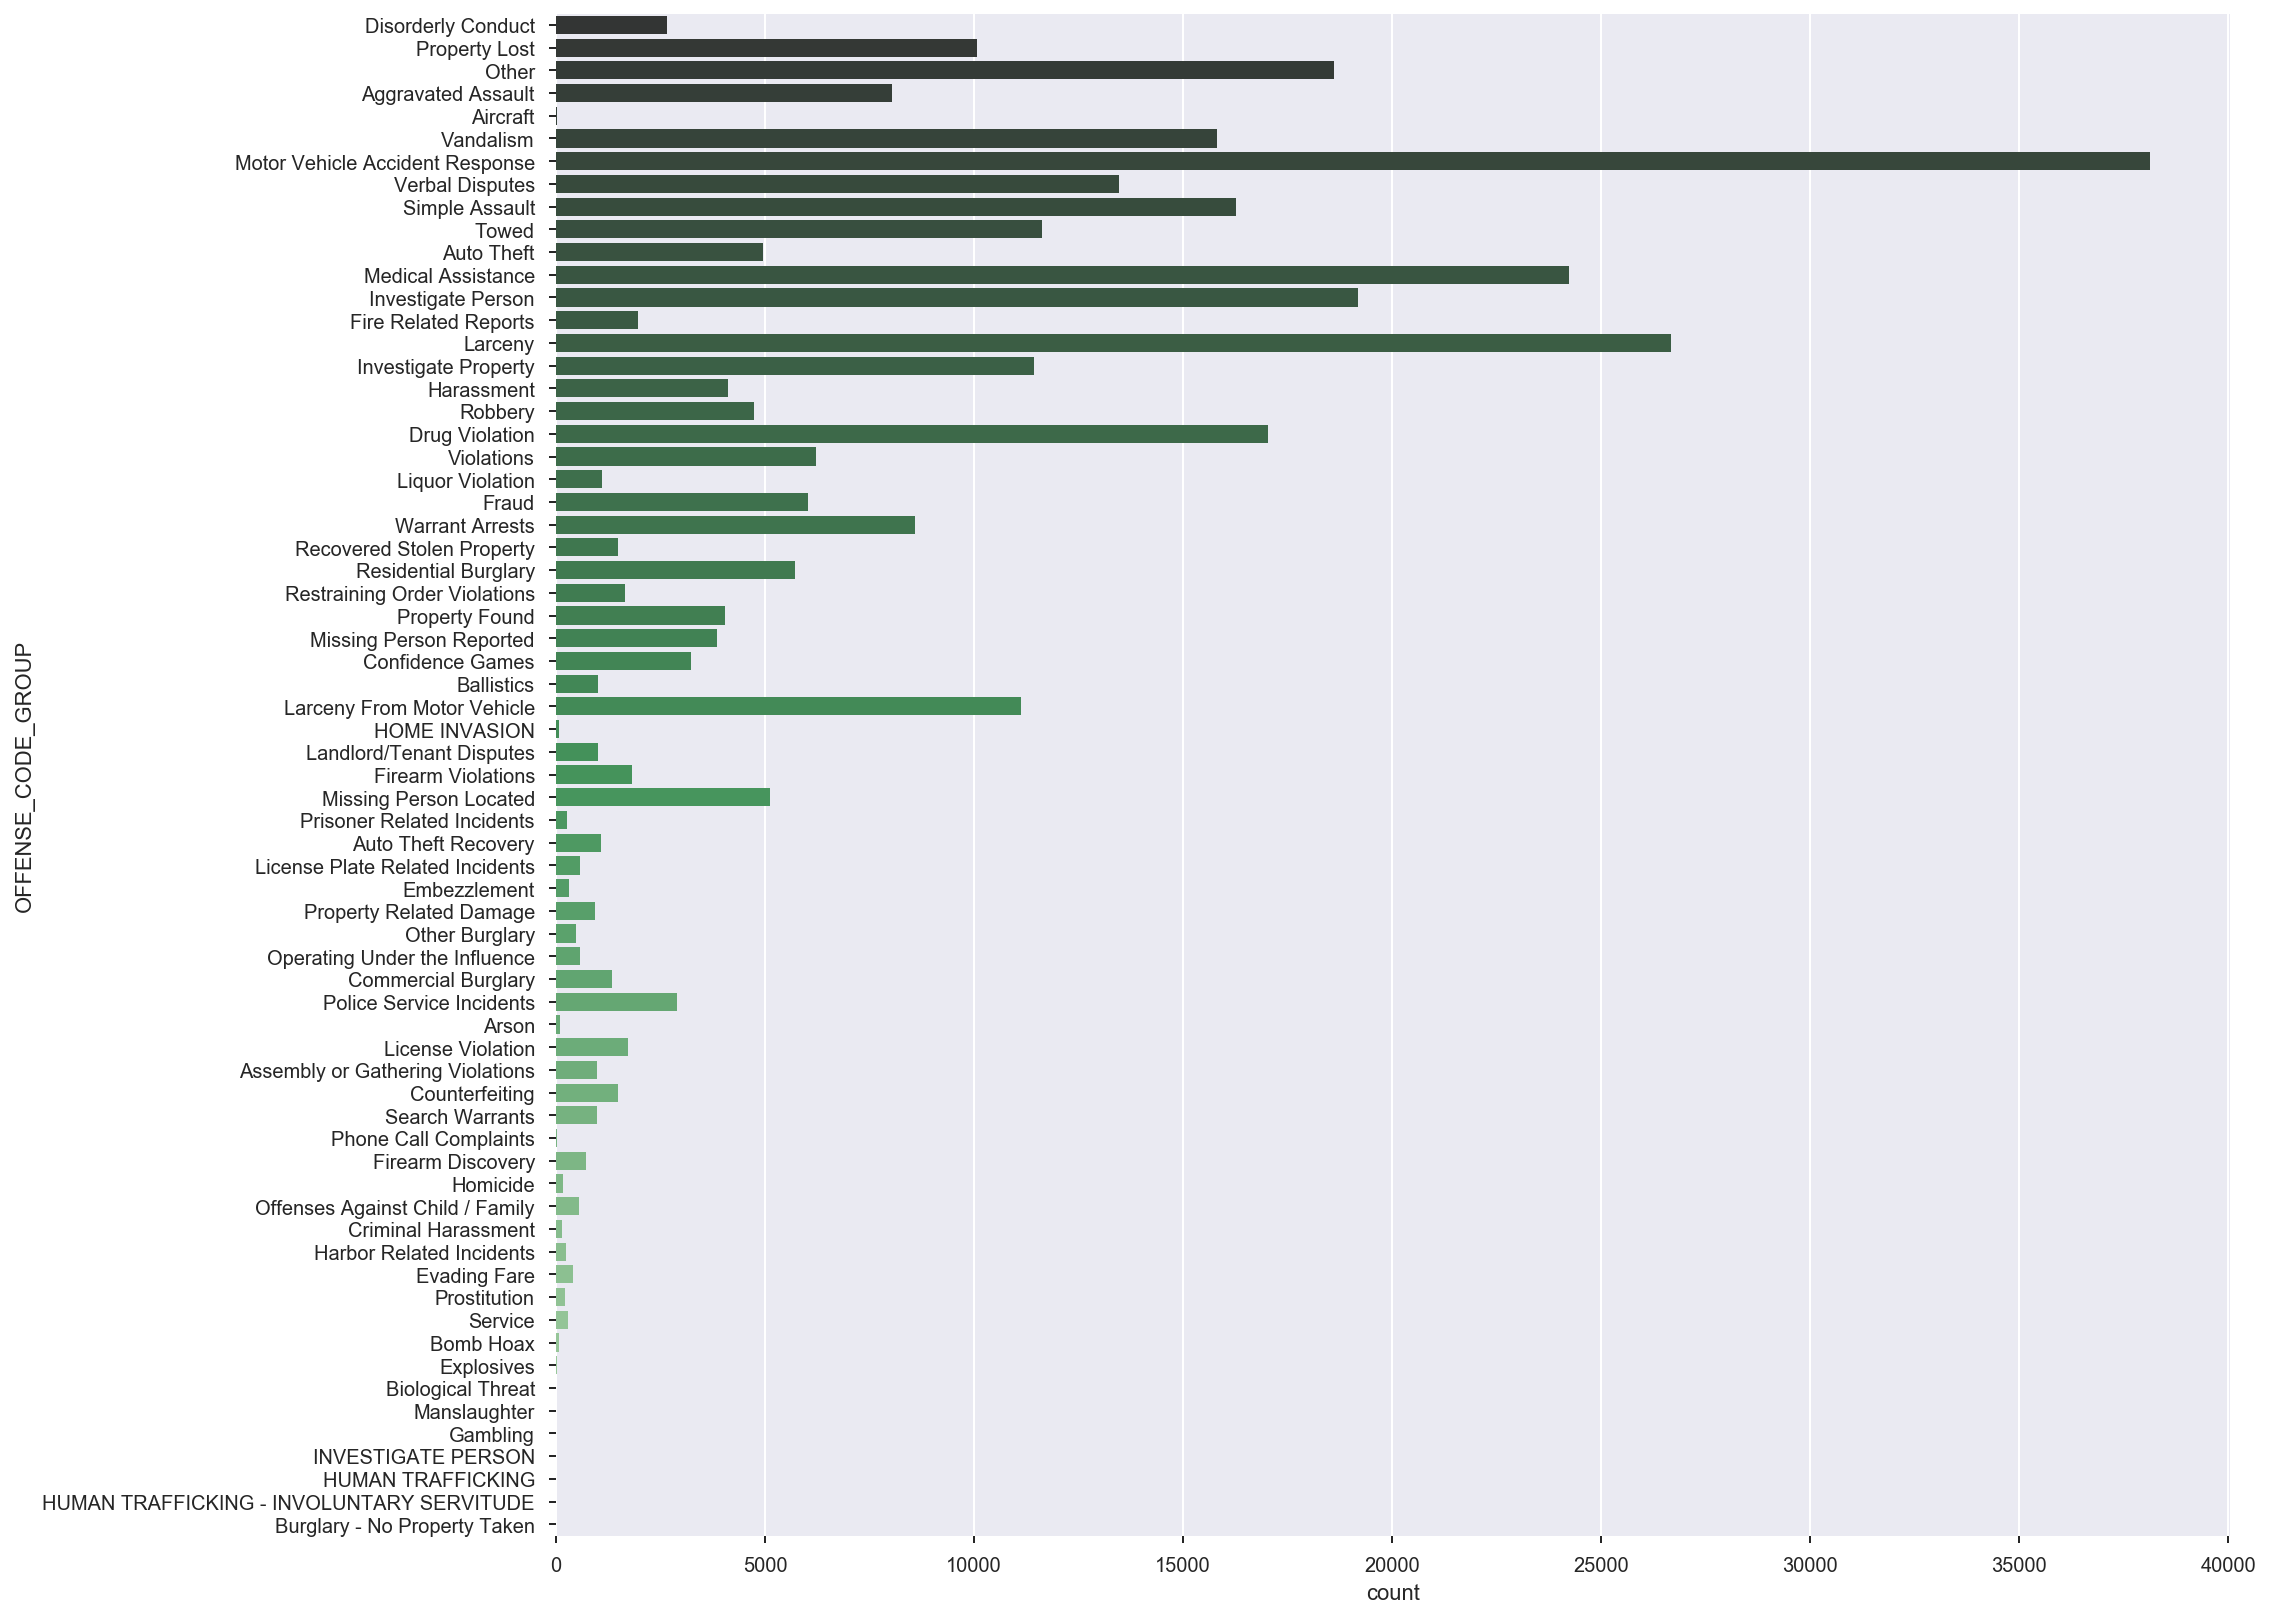

In [27]:
plt.figure(figsize=(15,14))
sns.countplot(y="OFFENSE_CODE_GROUP", data=data, palette="Greens_d",)

### Geo Location Exploration

In [28]:
data[['Lat','Long']].describe()

Lat           Long
count  307188.000000  307188.000000
mean       42.212995     -70.906030
std         2.173496       3.515832
min        -1.000000     -71.178674
25%        42.297466     -71.097081
50%        42.325552     -71.077493
75%        42.348624     -71.062482
max        42.395042      -1.000000

In [29]:
location = data[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

x = location['Long']
y = location['Lat']

colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

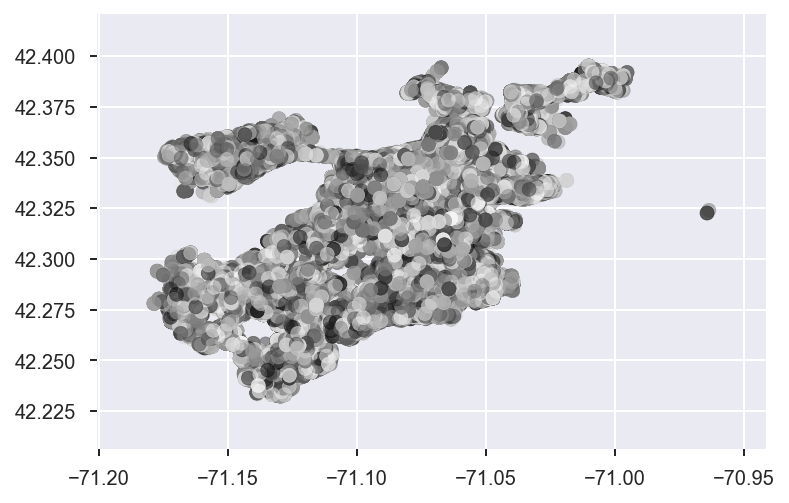

In [30]:
plt.scatter(x, y,c=colors, alpha=0.5)

In [31]:
plt.show()

In [32]:
m = folium.Map([42.348624, -71.062492], zoom_start=11)

In [33]:
m

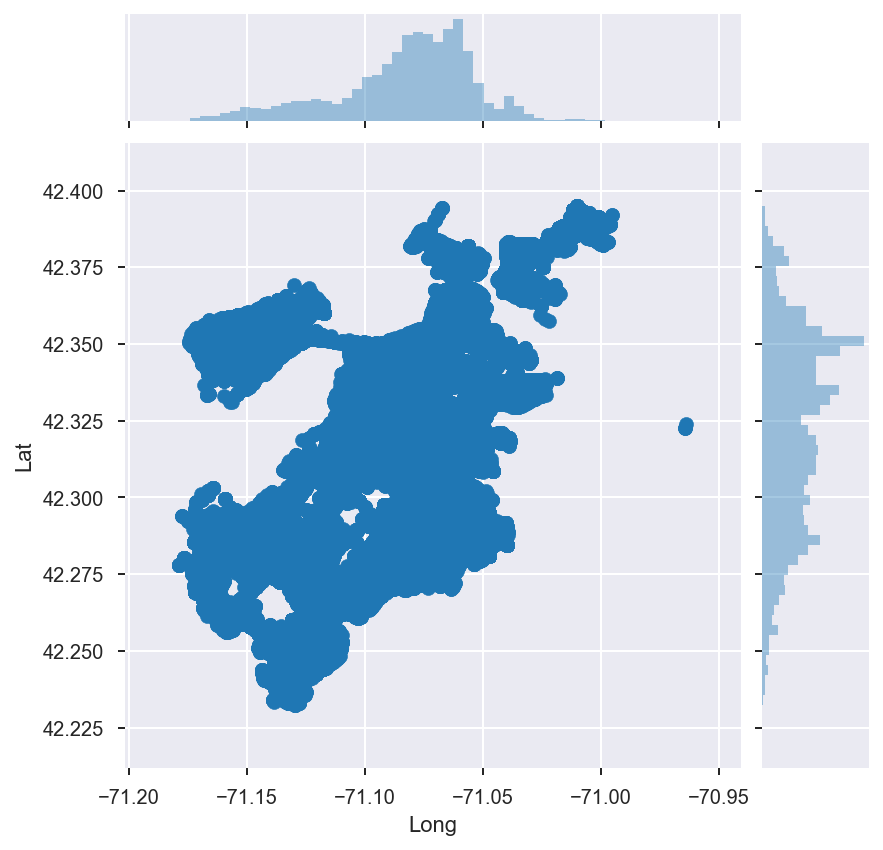

In [34]:
 sns.jointplot(x, y, kind='scatter')

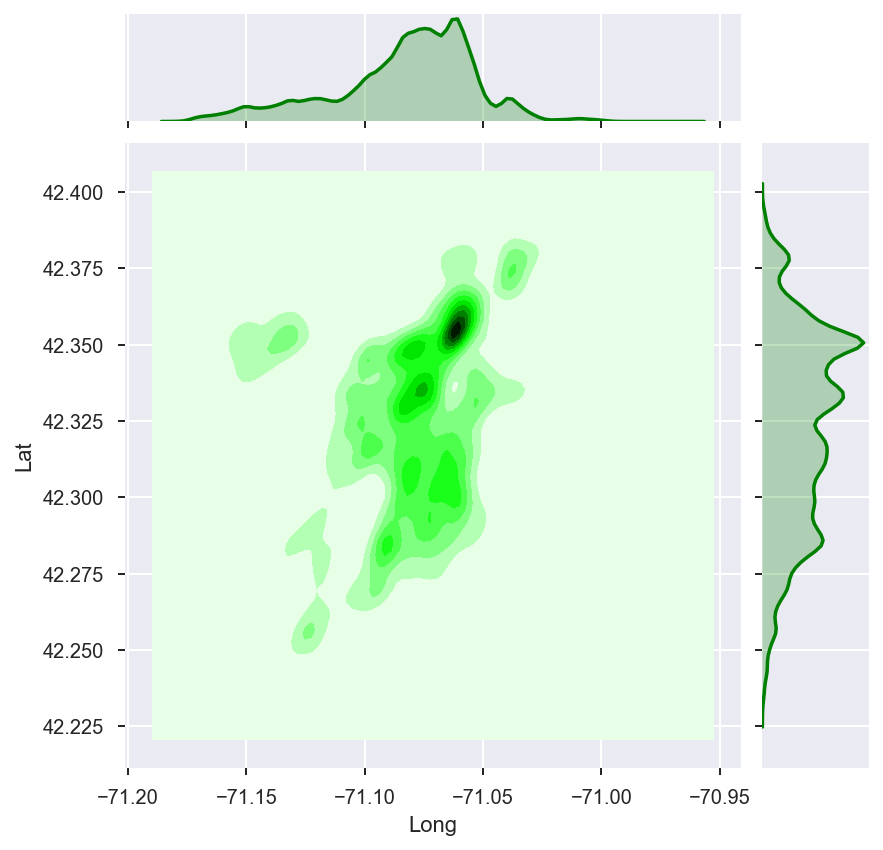

In [35]:
sns.jointplot(x, y, kind='kde',color='green')

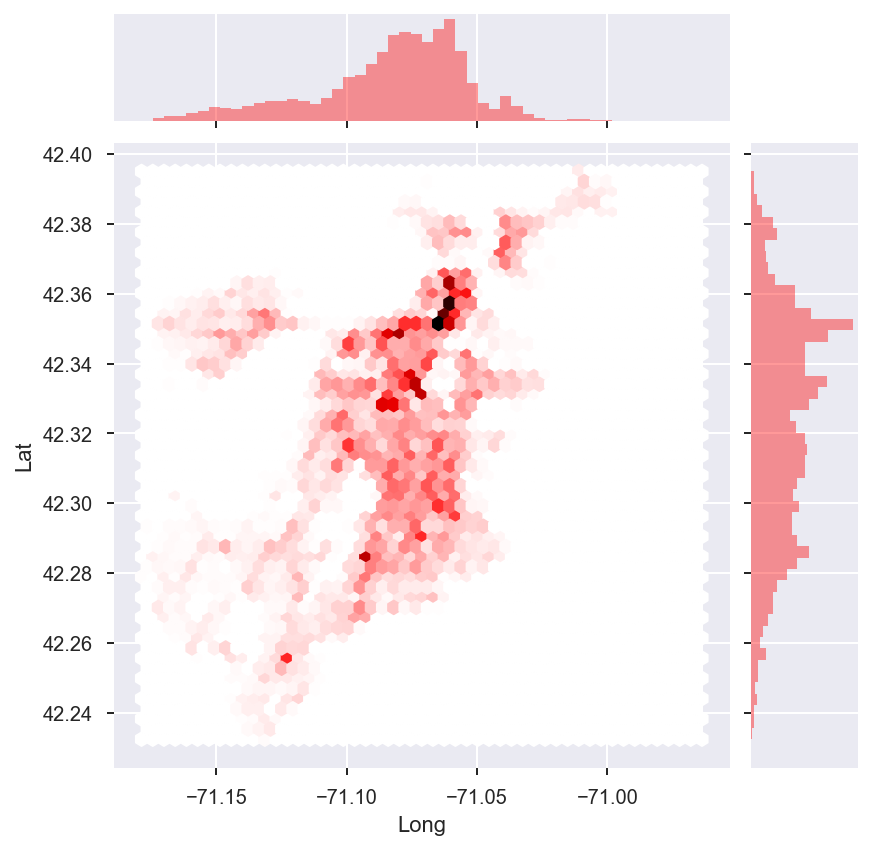

In [36]:
sns.jointplot(x, y, kind='hex',color='red')

In [37]:
print('Mode of Latitude '+str(data["Lat"].mode()[0]))

Mode of Latitude 42.34862382


In [38]:
print('Mode of Longitude '+str(data["Long"].mode()[0]))

Mode of Longitude -71.08277637


In [39]:
print('Mode of Latitude '+str(data["Lat"].mean()))

Mode of Latitude 42.212995057692204


In [40]:
print('Mode of Longitude '+str(data["Long"].mean()))

Mode of Longitude -70.90603030527016


### Larceny Areas

In [41]:
locationlac= data[data['OFFENSE_CODE_GROUP']=='Larceny']
location = locationlac[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

x = location['Long']
y = location['Lat']

colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

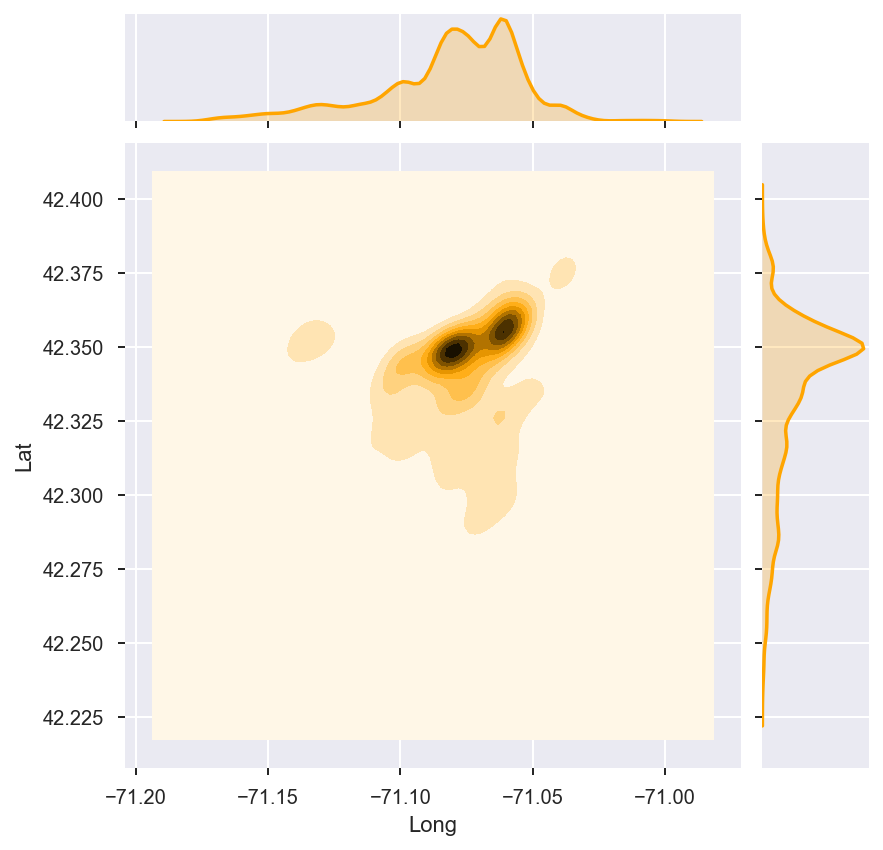

In [42]:
sns.jointplot(x, y, kind='kde',color='orange')

### Motor Vehicle Accident Response Areas

In [43]:
locationmv= data[data['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response']
location = locationmv[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

x = location['Long']
y = location['Lat']

colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

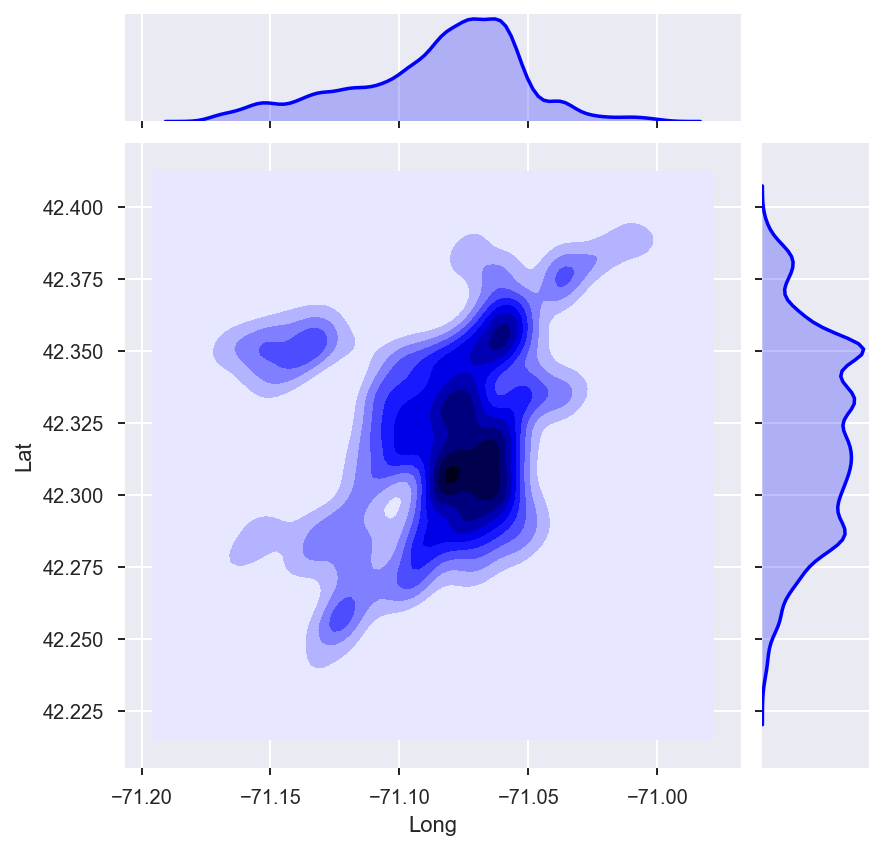

In [44]:
sns.jointplot(x, y, kind='kde',color='blue')

### Medical Assistance Areas

In [45]:
locationma= data[data['OFFENSE_CODE_GROUP']=='Medical Assistance']
location = locationma[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

x = location['Long']
y = location['Lat']

colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

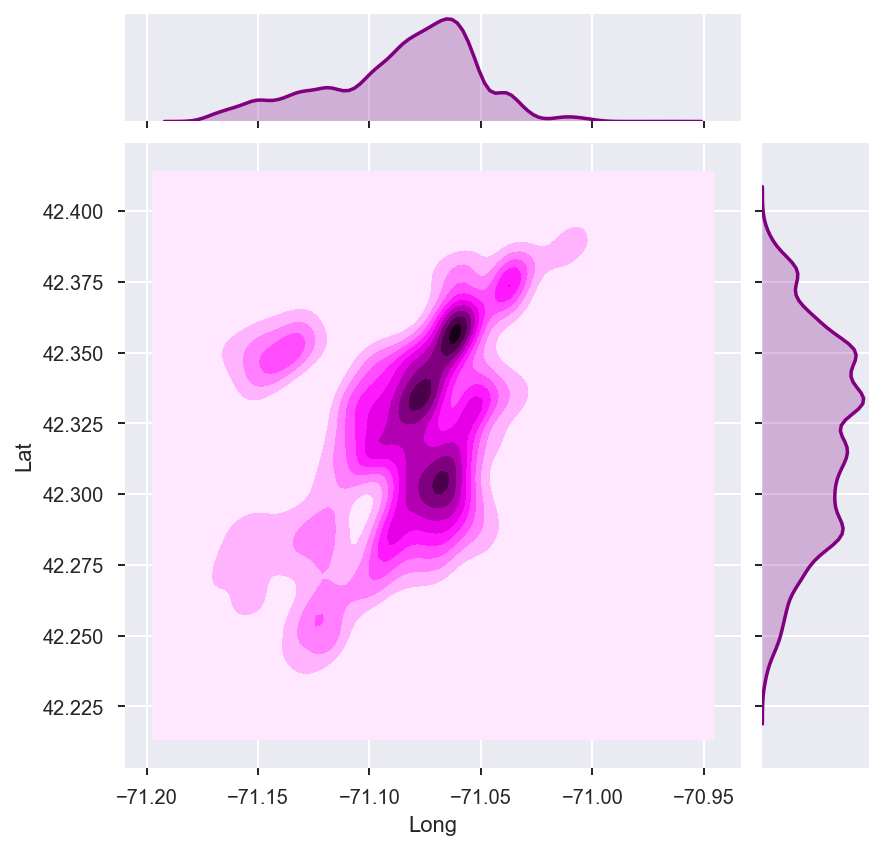

In [46]:
sns.jointplot(x, y, kind='kde',color='purple')

## Data Cleaning and Preprocessing

In [47]:
data.isnull().sum().sum()

380873

In [48]:
data_not_nulls=data.dropna()

In [49]:
print('Total Number of Null Values : '+str(data_not_nulls.isnull().sum().sum()))

Total Number of Null Values : 0


In [50]:
data_not_nulls.size

18108

In [51]:
'Total Number of Rows : '+str(data_not_nulls.shape[0])+' and Total Number of Columns : '+str(data_not_nulls.shape[1])

'Total Number of Rows : 1006 and Total Number of Columns : 18'

In [52]:
# If all of the null vaulues removed, clean dataset is 0.3% of the original dataset.
(int(data_not_nulls.size)/int(data.size))*100

0.306875724482948

Since the null values are not few, I decided to impute null values. 

Numerical values imputed with average of every column.

I have thought of imuting string variables with mode but it might distort the model and the outcome might be biased.
Therefore I filled Null string values with 'unknown' and null numeric values with mean.

In [53]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
period                      0
dtype: int64

Long, Lat and Location features excluded while imputing missing numeric values with mean.

In [54]:
def imputeMissingValues(x):
    tmp=0
    for i in range(1,x.isnull().sum().count()):
        if np.array(x.isnull().sum())[i]!=0 and str(x[x.columns[i]].dtype)=='object':
            tmp+=np.array(x.isnull().sum())[i]
            x[x.columns[i]].fillna('unknown', inplace=True)
        if np.array(x.isnull().sum())[i]!=0 and str(x[x.columns[i]].dtype)!='object' and x.columns[i]=='Long' and x.columns[i]=='Lat'  and x.columns[i]=='Location':
            tmp+=np.array(x.isnull().sum())[i]
            x[x.columns[i]].fillna(x[x.columns[i]].mean(), inplace=True)
    print('Total number of imputed values='+str(tmp))

In [55]:
data=data.drop(['INCIDENT_NUMBER'],axis=1)

In [56]:
imputeMissingValues(data)

Total number of imputed values=339609


In [ ]:
# I tried to apply encoding buy my kernel died beacause of local machine memory limitations.
data = pd.get_dummies(data) # Encoding with get_dummies

In [ ]:
# Slicing for subsetting.
data1=data[['OFFENSE_CODE_GROUP','DISTRICT','REPORTING_AREA','Lat','Long']]

In [ ]:
data1 = pd.get_dummies(data1) # Encoding with get_dummies

In [ ]:
names = data1.columns

In [ ]:
data1 = MinMaxScaler().fit_transform(data1) # Standardization

In [ ]:
data1 = pd.DataFrame(data1, columns=names) # Convert to DataFrame

In [ ]:
# I tried to see the correaltion between lat and long numeric values.Still it takes to much time and memory.
# I am aware that this correlation could not mean a connection since numeric values of location indicates only geo points.
print('Correlation with Crime')
data1.corr()['Lat'].sort_values()
data1.corr()['Long'].sort_values()

## Answers

**Q.1.**	How has crime changed over the years?

**A.1.**    Number of crime records has increased until 2017 in Boston City. However, in 2018, it decreased around 25k records. Crime trends in different type of periods can be seen in above charts.
<br><br>

**Q.2.**	Is it possible to predict where or when a crime will be committed? 

**A.2.**    It is possible to predict location of a crime with this dataset. Dense areas and features of these records can help us to predict possible crimes. Event the types of crime records are labeled, clustering methods also can be applied in order to find clusters. In addition time series methods could be helpful for predicting the amount of future possible crime records.
<br><br>

**Q.3.**	What can you say about the distribution of different offenses over the city?

**A.3.**    We can see that three major Offense Code Group are Lacreny, Medical Assistance and Motor Vehicle Accident Response. Lacreny records located mostly around Brookline. Medical Assistance records are dense around Beacon Hill and Dorchester. Finally, Motor Vehicle Accidents are located mostly around 28 Park View Street Dorchester.
<br><br>

**Q.4.**	What are the best locations for police stations?

**A.4.**    It can be clearly seen that there are some dense areas where the ratio of crime records is more than other areas. The heatmaps is dense around Nassau Street, Chinatown and Roxbury which are the right spot for police stations. In addition, these kind of critical districts can be cricled with several polise stations.
<br><br>

**Q.5.**	Is it possible to estimate the optimal size of the Boston police force? 

**A.5.**    Insights could give us a understanding of criminal areas and types of offenses. In order to predict optimal size of police forces, we need to know the number of adequate policeman for handling all different kind of offenses.
<br><br>

**Q.6.**	How would you schedule and route the patrol cars?

**A.6.**    Rush hour for crime records are 12,16,17,18 and 19. Evening schedule is ciritical for the safety of the city. Shortest path algorithms can be used for calculating the optimal route for patrol cars around ciriminal locations.
<br><br>

### Conclusion

In this case study, Crime Dataset of Boston City has analysed which contains records from the new crime incident report system. It also includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

Exploratory data analysis applied with various types of visualisation techniques. Plenty of insights have discovered in this process. According to these insights and researches on the internet, questions has answered.

### Future Works

For future works, below geographical calculation methods and location analysis techniques can be applied to the dataset:

* SPATIAL AUTOCORRELATION:
It is used for most of the geographical calculations. These geographical calculations (temperature, elevation, rainfall) are used especially in survey engineering, meteorology, and physics.
ArcGIS, ArcMap, GeoDa are used mostly to calculating spatial autocorrelation.

* INVERSE DISTANCE WEIGHTING (IDW) INTERPOLATION:
It is considered that one of the interpolation techniques.

* KRIGING INTERPOLATION:
Optimal values of the data at the other points using data from known near-points is estimated by an interpolation method which is called Kriging interpolation.